In [45]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from Data_Preparation_1 import *
from keras.utils import to_categorical
#from keras.layers import LeakyReLU

In [47]:
X,y = create_training_data()

//ibs9010/current_data/Data_Keshav/Cropped_Images/trial/Background
2
2
0
//ibs9010/current_data/Data_Keshav/Cropped_Images/trial/Neuron
2
2
1


In [48]:
#def binary_classification_model():
model = Sequential()

model.add(Conv2D(128,(3,3),padding = 'same',input_shape=(X.shape[1:]),kernel_initializer = 'he_normal'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.4))

model.add(Conv2D(64,(3,3),padding = 'same',input_shape=(X.shape[1:]),kernel_initializer = 'he_normal'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),padding = 'same',input_shape=(X.shape[1:]),kernel_initializer = 'he_normal'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),padding = 'same',input_shape=(X.shape[1:]),kernel_initializer = 'he_normal'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),padding = 'same',kernel_initializer = 'he_normal'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation("relu")) # added a hidden layer

model.add(Dense(64))
model.add(Activation("relu")) # added a new hidden layer

model.add(Dense(64))
model.add(Activation("relu")) # added a new hidden layer

model.add(Dense(64))
model.add(Activation("relu")) # added a new hidden layer

model.add(Dense(2))
#model.add(Dense(4))
model.add(Activation('softmax')) # chaging from sigmoid to softmax to include more classes

########################
#class_weight = {0: 1., 1: 15.}
#class_weight = {0: 5, 1: 10., 2: 1., 3:5.}
########################

#filepath="weights.best.hdf5"
ada = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss ="categorical_crossentropy", optimizer = 'adam', metrics = ["accuracy"])
y_train=to_categorical(y, num_classes=2)

model.summary()
#lr_model_history=model.fit(X,y_train,batch_size=64,epochs= 10,validation_split=0.1,class_weight=class_weight)
lr_model_history=model.fit(X,y_train,batch_size=64,epochs= 500,validation_split=0.1)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 70, 70, 128)       1280      
_________________________________________________________________
activation_30 (Activation)   (None, 70, 70, 128)       0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 35, 35, 64)        73792     
_________________________________________________________________
activation_31 (Activation)   (None, 35, 35, 64)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 17, 17, 64)       

2983/2983 [==============================] - 33s 11ms/sample - loss: 3.9027e-06 - accuracy: 1.0000 - val_loss: 0.8773 - val_accuracy: 0.9157
Epoch 84/500
2983/2983 [==============================] - 34s 11ms/sample - loss: 3.7469e-06 - accuracy: 1.0000 - val_loss: 0.8807 - val_accuracy: 0.9157
Epoch 85/500
2983/2983 [==============================] - 34s 11ms/sample - loss: 3.5965e-06 - accuracy: 1.0000 - val_loss: 0.8839 - val_accuracy: 0.9157
Epoch 86/500
2983/2983 [==============================] - 35s 12ms/sample - loss: 3.4590e-06 - accuracy: 1.0000 - val_loss: 0.8871 - val_accuracy: 0.9157
Epoch 87/500
2983/2983 [==============================] - 34s 11ms/sample - loss: 3.3236e-06 - accuracy: 1.0000 - val_loss: 0.8902 - val_accuracy: 0.9157
Epoch 88/500
2983/2983 [==============================] - 34s 11ms/sample - loss: 3.2009e-06 - accuracy: 1.0000 - val_loss: 0.8932 - val_accuracy: 0.9157
Epoch 89/500
2983/2983 [==============================] - 34s 11ms/sample - loss: 3.0767e

2983/2983 [==============================] - 33s 11ms/sample - loss: 6.0731e-07 - accuracy: 1.0000 - val_loss: 1.0282 - val_accuracy: 0.9157
Epoch 137/500
2983/2983 [==============================] - 34s 11ms/sample - loss: 5.8892e-07 - accuracy: 1.0000 - val_loss: 1.0308 - val_accuracy: 0.9157
Epoch 138/500
2983/2983 [==============================] - 33s 11ms/sample - loss: 5.6938e-07 - accuracy: 1.0000 - val_loss: 1.0332 - val_accuracy: 0.9157
Epoch 139/500
2983/2983 [==============================] - 33s 11ms/sample - loss: 5.5184e-07 - accuracy: 1.0000 - val_loss: 1.0359 - val_accuracy: 0.9157
Epoch 140/500
2983/2983 [==============================] - 33s 11ms/sample - loss: 5.3482e-07 - accuracy: 1.0000 - val_loss: 1.0385 - val_accuracy: 0.9157
Epoch 141/500
2983/2983 [==============================] - 33s 11ms/sample - loss: 5.1879e-07 - accuracy: 1.0000 - val_loss: 1.0411 - val_accuracy: 0.9157
Epoch 142/500
2983/2983 [==============================] - 33s 11ms/sample - loss: 5

Epoch 189/500
2983/2983 [==============================] - 32s 11ms/sample - loss: 1.2109e-07 - accuracy: 1.0000 - val_loss: 1.1571 - val_accuracy: 0.9127
Epoch 190/500
2983/2983 [==============================] - 32s 11ms/sample - loss: 1.1757e-07 - accuracy: 1.0000 - val_loss: 1.1595 - val_accuracy: 0.9127
Epoch 191/500
2983/2983 [==============================] - 32s 11ms/sample - loss: 1.1429e-07 - accuracy: 1.0000 - val_loss: 1.1618 - val_accuracy: 0.9127
Epoch 192/500
2983/2983 [==============================] - 32s 11ms/sample - loss: 1.1062e-07 - accuracy: 1.0000 - val_loss: 1.1645 - val_accuracy: 0.9127
Epoch 193/500
2983/2983 [==============================] - 32s 11ms/sample - loss: 1.0778e-07 - accuracy: 1.0000 - val_loss: 1.1669 - val_accuracy: 0.9127
Epoch 194/500
2983/2983 [==============================] - 33s 11ms/sample - loss: 1.0418e-07 - accuracy: 1.0000 - val_loss: 1.1694 - val_accuracy: 0.9127
Epoch 195/500
2983/2983 [==============================] - 32s 11ms/sa

Epoch 242/500
2983/2983 [==============================] - 33s 11ms/sample - loss: 2.5856e-08 - accuracy: 1.0000 - val_loss: 1.2828 - val_accuracy: 0.9127
Epoch 243/500
2983/2983 [==============================] - 33s 11ms/sample - loss: 2.5097e-08 - accuracy: 1.0000 - val_loss: 1.2852 - val_accuracy: 0.9127
Epoch 244/500
2983/2983 [==============================] - 33s 11ms/sample - loss: 2.4297e-08 - accuracy: 1.0000 - val_loss: 1.2877 - val_accuracy: 0.9127
Epoch 245/500
2983/2983 [==============================] - 34s 11ms/sample - loss: 2.3258e-08 - accuracy: 1.0000 - val_loss: 1.2911 - val_accuracy: 0.9127
Epoch 246/500
2983/2983 [==============================] - 32s 11ms/sample - loss: 2.2499e-08 - accuracy: 1.0000 - val_loss: 1.2946 - val_accuracy: 0.9127
Epoch 247/500
2983/2983 [==============================] - 32s 11ms/sample - loss: 2.1860e-08 - accuracy: 1.0000 - val_loss: 1.2979 - val_accuracy: 0.9127
Epoch 248/500
2983/2983 [==============================] - 32s 11ms/sa

Epoch 295/500
2983/2983 [==============================] - 32s 11ms/sample - loss: 4.2361e-09 - accuracy: 1.0000 - val_loss: 1.4351 - val_accuracy: 0.9157
Epoch 296/500
2983/2983 [==============================] - 32s 11ms/sample - loss: 4.0762e-09 - accuracy: 1.0000 - val_loss: 1.4375 - val_accuracy: 0.9157
Epoch 297/500
2983/2983 [==============================] - 32s 11ms/sample - loss: 3.7965e-09 - accuracy: 1.0000 - val_loss: 1.4400 - val_accuracy: 0.9157
Epoch 298/500
2983/2983 [==============================] - 32s 11ms/sample - loss: 3.7165e-09 - accuracy: 1.0000 - val_loss: 1.4425 - val_accuracy: 0.9157
Epoch 299/500
2983/2983 [==============================] - 32s 11ms/sample - loss: 3.5167e-09 - accuracy: 1.0000 - val_loss: 1.4448 - val_accuracy: 0.9157
Epoch 300/500
2983/2983 [==============================] - 32s 11ms/sample - loss: 3.3569e-09 - accuracy: 1.0000 - val_loss: 1.4471 - val_accuracy: 0.9157
Epoch 301/500
2983/2983 [==============================] - 32s 11ms/sa

Epoch 348/500
2983/2983 [==============================] - 32s 11ms/sample - loss: 6.3941e-10 - accuracy: 1.0000 - val_loss: 1.5474 - val_accuracy: 0.9157
Epoch 349/500
2983/2983 [==============================] - 32s 11ms/sample - loss: 5.9944e-10 - accuracy: 1.0000 - val_loss: 1.5494 - val_accuracy: 0.9157
Epoch 350/500
2983/2983 [==============================] - 32s 11ms/sample - loss: 5.5948e-10 - accuracy: 1.0000 - val_loss: 1.5512 - val_accuracy: 0.9157
Epoch 351/500
2983/2983 [==============================] - 32s 11ms/sample - loss: 5.5948e-10 - accuracy: 1.0000 - val_loss: 1.5531 - val_accuracy: 0.9157
Epoch 352/500
2983/2983 [==============================] - 32s 11ms/sample - loss: 5.5948e-10 - accuracy: 1.0000 - val_loss: 1.5549 - val_accuracy: 0.9157
Epoch 353/500
2983/2983 [==============================] - 33s 11ms/sample - loss: 5.5948e-10 - accuracy: 1.0000 - val_loss: 1.5569 - val_accuracy: 0.9157
Epoch 354/500
2983/2983 [==============================] - 32s 11ms/sa

Epoch 401/500
2983/2983 [==============================] - 32s 11ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.6433 - val_accuracy: 0.9127
Epoch 402/500
2983/2983 [==============================] - 33s 11ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.6450 - val_accuracy: 0.9127
Epoch 403/500
2983/2983 [==============================] - 33s 11ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.6468 - val_accuracy: 0.9127
Epoch 404/500
2983/2983 [==============================] - 33s 11ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.6485 - val_accuracy: 0.9127
Epoch 405/500
2983/2983 [==============================] - 34s 11ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.6502 - val_accuracy: 0.9127
Epoch 406/500
2983/2983 [==============================] - 33s 11ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.6521 - val_accuracy: 0.9127
Epoch 407/500
2983/2983 [==============================] - 34s 11ms/sa

Epoch 454/500
2983/2983 [==============================] - 32s 11ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.7371 - val_accuracy: 0.9127
Epoch 455/500
2983/2983 [==============================] - 32s 11ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.7388 - val_accuracy: 0.9127
Epoch 456/500
2983/2983 [==============================] - 32s 11ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.7405 - val_accuracy: 0.9127
Epoch 457/500
2983/2983 [==============================] - 32s 11ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.7424 - val_accuracy: 0.9127
Epoch 458/500
2983/2983 [==============================] - 32s 11ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.7442 - val_accuracy: 0.9127
Epoch 459/500
2983/2983 [==============================] - 33s 11ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.7460 - val_accuracy: 0.9127
Epoch 460/500
2983/2983 [==============================] - 32s 11ms/sa

In [63]:
model.save("//ibs9010/current_data/Data_Keshav/image/Classification_model/NeuronClassifierModels/BinaryClassifier_bigtile_500epoch_3slicetrialdata/")  

NotFoundError: Failed to create a NewWriteableFile: //ibs9010/current_data/Data_Keshav/image/Classification_model/NeuronClassifierModels/BinaryClassifier_bigtile_500epoch_3slicetrialdata/variables\variables_temp_eaa546ff2da74e2bb85058d4573ec632/part-00000-of-00001.data-00000-of-00001.tempstate6903503056362727234 : The system cannot find the path specified.
; No such process [Op:SaveV2]

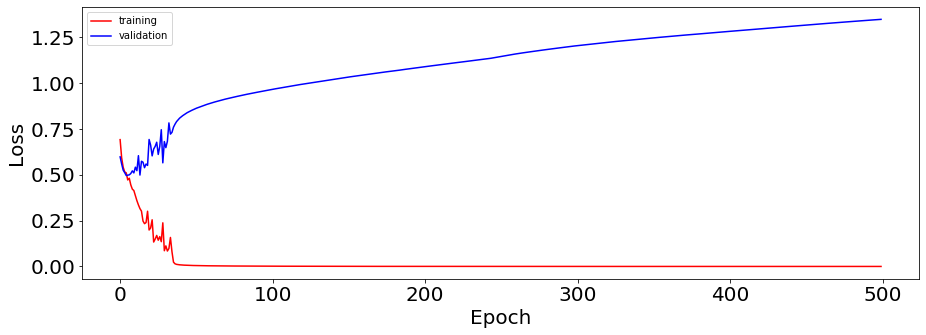

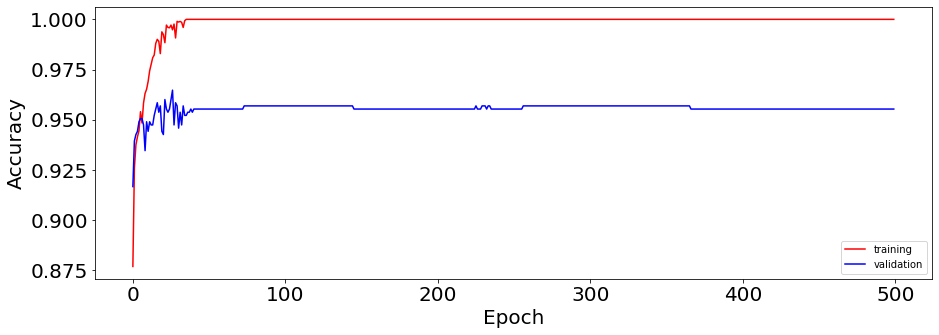

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax.plot(np.sqrt(lr_model_history.history['loss']), 'r', label='training')
ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'b' ,label='validation')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax.plot(np.sqrt(lr_model_history.history['accuracy']), 'r', label='training')
ax.plot(np.sqrt(lr_model_history.history['val_accuracy']), 'b' ,label='validation')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

## Loading Model

In [ ]:
from tensorflow import keras
model = keras.models.load_model('//ibs9010/current_data/Data_Keshav/image/Classification_model/NeuronClassifierModels/BinaryClassifier_200epoch_4hidden_doubledata/')

## Running inference on all Tiles 

In [70]:
import os
import cv2
import numpy as np
img_size = 70 # fix the size of the image
Path = "//ibs9010/current_data/Data_Keshav/Cropped_Images/S51_bigtile_new/" 
#Path = "//ibs9010/current_data/Data_Keshav/image/Classification_model/Data/Test/"
#Path = '//ibs9010/current_data/Data_Keshav/image/Classification_model/testingcrop/S055/'
Testing_image = []# list of testing images
image_name = []# list of image names

for img in os.listdir(Path): #gives the images from the path
    img_array = cv2.imread(os.path.join(Path,img),cv2.IMREAD_GRAYSCALE) # read every image in gray scale from the given path
    Testing_image.append(img_array)
    image_name.append(img)
    
print("Number of test images:",len(Testing_image))
#Running Inference
Test_image = np.array(Testing_image).reshape(-1,img_size,img_size,1)
#make an array of every element of list from Testing_image and then reshape them
Test_image = Test_image/255.0
scores = model.predict_classes(Test_image)

# Results
neuron_image_counter = bkgd_image_counter = 0
for i in range(len(Test_image)):
    #print("Image:",image_name[i],"with score:",scores[i]) 
    if scores[i]==0:
        bkgd_image_counter +=1
    if scores[i]==1:
        neuron_image_counter += 1
    
print("Total testing images:",len(Testing_image))
print("bkgd_image_counter:",bkgd_image_counter,"neuron_image_counter:",neuron_image_counter)


Number of test images: 4833
Total testing images: 4833
bkgd_image_counter: 4610 neuron_image_counter: 223


## Saving classified tiles into respective folders

In [71]:
# saving the single neuron tiles into a particular folder for now - as a adhoc fix!
import os
import cv2
dest_path = '//ibs9010/current_data/Data_Keshav/image/Classification_model/Inference/BinaryClasses/singleneurontiles'
#dest_path = "//ibs9010/current_data/Data_Keshav/image/Classification_model/Inference/BinaryClasses/NewTestsingleneurontiles"
directory = '//ibs9010/current_data/Data_Keshav/image/Classification_model/Data/Test/'

# Delete all exiting images
import glob
os.chdir(dest_path)
files=glob.glob('*.tif')
for filename in files:
    os.unlink(filename)
    
#need the images of class1 to be appended in a separate list
single_image_list  = [] # contains list of filenames of single neurons
#sn_images = [] # conatins tiles of single neurons #(actual images itself)
for k in range(1,len(Test_image)):
    if scores[k]==1:
        #print(Test_image[i])
        #print("Image ",image_name[k])
        #sn_images.append(Test_image[i])
        single_image_list.append(image_name[k])
        
print(len(single_image_list))  
#image_name[i]
for i in range(len(Test_image)):
    if scores[i]==1:
        #print("Image:",image_name[i])
        #print("TestImage:",Test_image[i])
        #cv2.imwrite(image_name[i], Test_image[i])
        cv2.imwrite(os.path.join(dest_path,image_name[i]), Test_image[i]*255)
        #pass

223


# Generating Pickle files for classified tiles
## To be used for generating landmarks

In [64]:
# Generating pickle file For Single neurons
import pickle
with open('//ibs9010/current_data/Data_Keshav/image/Classification_model/21july_binary_SN_MG48_3day_bs_S051.pkl', 'wb') as f:
    pickle.dump(single_image_list, f)

In [67]:
# saving the bkgd neuron tiles into a particular folder for now - as a adhoc fix!
import os
import cv2
#dest_path = '//ibs9010/current_data/Data_Keshav/image/Classification_model/Inference/BinaryClasses/NewTestbackgroundneurontiles'
dest_path = '//ibs9010/current_data/Data_Keshav/image/Classification_model/Inference/BinaryClasses/backgroundneurontiles'
directory = '//ibs9010/current_data/Data_Keshav/image/Classification_model/Data/Test/'

# Delete all exiting images
import glob
os.chdir(dest_path)
files=glob.glob('*.tif')
for filename in files:
    os.unlink(filename)

#need the images of class1 to be appended in a separate list
bkgd_image_list  = [] # contains list of filenames of single neurons
#sn_images = [] # conatins tiles of single neurons #(actual images itself)
for k in range(1,len(Test_image)):
    if scores[k]==0:
        #print(Test_image[i])
        #print("Image ",image_name[k])
        #sn_images.append(Test_image[i])
        bkgd_image_list.append(image_name[k])
        
print(len(bkgd_image_list))  
#image_name[i]
for i in range(len(Test_image)):
    if scores[i]==0:
        #print("Image:",image_name[i])
        #print("TestImage:",Test_image[i])
        #cv2.imwrite(image_name[i], Test_image[i])
        cv2.imwrite(os.path.join(dest_path,image_name[i]), Test_image[i]*255)
        #pass

PermissionError: [WinError 5] Access is denied: '42.tif'